Introduction (What we want to do and what data we are looking at):
A novel corona virus (COVID 19) was identified in 2019 in Wuhan China. It has spread rapidly worldwide and was officially declared to be a pandemic by the WHO. To better understand the data available about it, we will be doing exploratory data analysis of the available COVID 19 data. The goal of the project is to study the impact of COVID 19 across the world using Python, Pandas and Matplotlib and present visualizations to show our analysis.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

In [45]:
# Loading the data
file = "Data/owid-covid-data.csv"

# Reading the data into a pandas dataframe
data = pd.read_csv(file)

In [46]:
# Get all the columns in the dataframe to look for the data needed
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [47]:
# Change the date format to datetime
#data['date'] = pd.to_datetime(data['date'],errors='ignore')

# Trend of Covid related total deaths by country - Vasanta

In [48]:
# Create a new dataframe with only the columns we want
covid_df = data[['iso_code','continent','location','date','people_fully_vaccinated','people_fully_vaccinated_per_hundred','total_deaths', 'new_deaths']]
covid_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
181458,ZWE,Africa,Zimbabwe,2022-04-20,NaN,NaN,5466.0,2.0
181459,ZWE,Africa,Zimbabwe,2022-04-21,3624003.0,24.01,5467.0,1.0
181460,ZWE,Africa,Zimbabwe,2022-04-22,3630122.0,24.05,5468.0,1.0
181461,ZWE,Africa,Zimbabwe,2022-04-23,3636597.0,24.10,5468.0,0.0


## Clean the data

In [49]:
# Drop the rows from continents rows with no data
covid_df_continent_clean = covid_df.dropna(subset=['continent'])
covid_df_continent_clean

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
181458,ZWE,Africa,Zimbabwe,2022-04-20,NaN,NaN,5466.0,2.0
181459,ZWE,Africa,Zimbabwe,2022-04-21,3624003.0,24.01,5467.0,1.0
181460,ZWE,Africa,Zimbabwe,2022-04-22,3630122.0,24.05,5468.0,1.0
181461,ZWE,Africa,Zimbabwe,2022-04-23,3636597.0,24.10,5468.0,0.0


### Cleaned data in clean covid dataframe

In [50]:
# Fill the missing values in the columns with 0
clean_covid_df = covid_df_continent_clean.fillna(value=0)
clean_covid_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,0.0,0.00,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,0.0,0.00,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,0.0,0.00,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,0.0,0.00,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
181458,ZWE,Africa,Zimbabwe,2022-04-20,0.0,0.00,5466.0,2.0
181459,ZWE,Africa,Zimbabwe,2022-04-21,3624003.0,24.01,5467.0,1.0
181460,ZWE,Africa,Zimbabwe,2022-04-22,3630122.0,24.05,5468.0,1.0
181461,ZWE,Africa,Zimbabwe,2022-04-23,3636597.0,24.10,5468.0,0.0


In [51]:
# Add a column for the max of total deaths to clean covid dataframe as it is cumulative
clean_covid_df['max_total_deaths'] = clean_covid_df.groupby('location')['total_deaths'].transform('max')
sorted_max_10deaths_df = clean_covid_df.sort_values(by='max_total_deaths', ascending=False).drop_duplicates(subset='max_total_deaths').nlargest(10, 'max_total_deaths')
sorted_max_50deaths_df = clean_covid_df.sort_values(by='max_total_deaths', ascending=False).drop_duplicates(subset='max_total_deaths').nlargest(50, 'max_total_deaths')
#sorted_max_deaths_df.reset_index(inplace=True)
#sorted_max_deaths_df1
sorted_max_10deaths_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths,max_total_deaths
171362,USA,North America,United States,2021-03-10,39781670.0,11.98,527025.0,1540.0,991254.0
23320,BRA,South America,Brazil,2021-09-14,75814267.0,35.43,588078.0,678.0,662891.0
75228,IND,Asia,India,2020-02-11,0.0,0.00,0.0,0.0,522223.0
134818,RUS,Europe,Russia,2020-02-19,0.0,0.00,0.0,0.0,367366.0
106282,MEX,North America,Mexico,2021-07-25,23955609.0,18.39,238424.0,108.0,324129.0
129721,PER,South America,Peru,2021-08-15,7239915.0,21.70,197393.0,53.0,212742.0
170208,GBR,Europe,United Kingdom,2020-04-14,0.0,0.00,14128.0,1077.0,173518.0
81635,ITA,Europe,Italy,2020-04-17,0.0,0.00,22745.0,575.0,162688.0
76566,IDN,Asia,Indonesia,2021-08-18,29403345.0,10.64,121141.0,1128.0,156100.0
57731,FRA,Europe,France,2020-08-08,0.0,0.00,30329.0,1.0,145129.0


In [52]:
#scatter plot of Top 50 countries with the highest number of deaths till that date
fig = px.scatter(sorted_max_50deaths_df, x='date',y='max_total_deaths', color='location',title='Total Deaths')
fig.show()

In [53]:
#scatter plot of Top 50 countries with the highest number of deaths
fig = px.scatter(sorted_max_50deaths_df, x='location',y='max_total_deaths', color='location',title='Top 50 countries with the highest number of deaths')
fig.show()

In [79]:
# pie chart showing a closer look of the top 10 countries with the highest number of deaths  
fig = px.pie(sorted_max_50deaths_df, values='max_total_deaths', names='location',labels='location', title='Top 10 Countries with the Most Deaths',opacity=0.9)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [55]:
# Top 10 fully vaccinated countries
clean_covid_df['total_fully_vaccinated'] = clean_covid_df.groupby('location')['people_fully_vaccinated'].transform('max')
sorted_max_10vacci_df = clean_covid_df.sort_values(by='total_fully_vaccinated', ascending=False).drop_duplicates(subset='total_fully_vaccinated').nlargest(10, 'total_fully_vaccinated')
sorted_max_50vacci_df = clean_covid_df.sort_values(by='total_fully_vaccinated', ascending=False).drop_duplicates(subset='total_fully_vaccinated').nlargest(50, 'total_fully_vaccinated')
sorted_max_10vacci_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths,max_total_deaths,total_fully_vaccinated
34420,CHN,Asia,China,2022-02-02,0.0,0.00,4636.0,0.0,4725.0,1.246769e+09
75216,IND,Asia,India,2020-01-30,0.0,0.00,0.0,0.0,522223.0,8.501796e+08
171642,USA,North America,United States,2021-12-15,206253797.0,62.12,801201.0,2253.0,991254.0,2.193383e+08
76297,IDN,Asia,Indonesia,2020-11-22,0.0,0.00,15884.0,110.0,156100.0,1.639540e+08
23383,BRA,South America,Brazil,2021-11-16,125915845.0,58.84,611759.0,143.0,662891.0,1.633226e+08
125565,PAK,Asia,Pakistan,2021-07-19,0.0,0.00,22848.0,37.0,30369.0,1.212343e+08
13977,BGD,Asia,Bangladesh,2021-08-03,4388569.0,2.64,21397.0,235.0,29127.0,1.158174e+08
83555,JPN,Asia,Japan,2021-03-04,0.0,0.00,8143.0,67.0,29305.0,1.013549e+08
105730,MEX,North America,Mexico,2020-01-20,0.0,0.00,0.0,0.0,324129.0,7.994500e+07
177760,VNM,Asia,Vietnam,2022-03-10,0.0,0.00,41157.0,71.0,43013.0,7.775411e+07


# Progress of fully vaccinated people in the world by continent - Vasanta

In [76]:
# find top 10 countries with the highest number of fully vaccinated people
top_10_vacci = sorted_max_10vacci_df['location'].tolist()

top_10_vacci_df = clean_covid_df[clean_covid_df['location'].isin(top_10_vacci)]
top_10_vacci_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths,max_total_deaths,total_fully_vaccinated
13464,BGD,Asia,Bangladesh,2020-03-08,0.0,0.0,0.0,0.0,29127.0,115817367.0
13465,BGD,Asia,Bangladesh,2020-03-09,0.0,0.0,0.0,0.0,29127.0,115817367.0
13466,BGD,Asia,Bangladesh,2020-03-10,0.0,0.0,0.0,0.0,29127.0,115817367.0
13467,BGD,Asia,Bangladesh,2020-03-11,0.0,0.0,0.0,0.0,29127.0,115817367.0
13468,BGD,Asia,Bangladesh,2020-03-12,0.0,0.0,0.0,0.0,29127.0,115817367.0
...,...,...,...,...,...,...,...,...,...,...
177801,VNM,Asia,Vietnam,2022-04-20,0.0,0.0,42982.0,7.0,43013.0,77754108.0
177802,VNM,Asia,Vietnam,2022-04-21,0.0,0.0,42991.0,9.0,43013.0,77754108.0
177803,VNM,Asia,Vietnam,2022-04-22,0.0,0.0,42998.0,7.0,43013.0,77754108.0
177804,VNM,Asia,Vietnam,2022-04-23,0.0,0.0,43004.0,6.0,43013.0,77754108.0


In [57]:
# line plot of Top 10 countries with the highest number of fully vaccinated people
fig = px.line(top_10_vacci_df, x='date',y='people_fully_vaccinated_per_hundred', color='location',title='Top 10 Countries with the Most Fully Vaccinated')
fig.show()

In [78]:
fig = px.choropleth(top_10_vacci_df, locations='location',locationmode='country names', color='people_fully_vaccinated_per_hundred',
                           color_continuous_scale="Purpor",projection="orthographic"
                          )
fig.update_layout(title="Top 10 Countries with the Most Fully Vaccinated",
                  titlefont={'size': 20},
                  paper_bgcolor='aliceblue'        
                  )
fig.show()

In [77]:
fig = px.choropleth(top_10_vacci_df, locations='location',locationmode='country names', hover_name='location', color='people_fully_vaccinated_per_hundred', animation_frame='date',
                           color_continuous_scale="Purpor"
                          )
fig.update_layout(title="Top 10 Countries with the Most Fully Vaccinated",
                  titlefont={'size': 20},
                  paper_bgcolor='aliceblue'        
                  )
fig.show()

# Research questions to answer:


# Initial research


In [60]:
#Mainly there are two steps to remove ‘NaN’ from the data-
#Using  Dataframe.fillna()  from the pandas’ library.
#Using  SimpleImputer from sklearn.impute (this is only useful if the data is present in the form of csv file)
#https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/
#https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc
age_death_df = data[[ 'continent','location', 'median_age','aged_65_older','aged_70_older','total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations','excess_mortality']]
age_death_df1 = age_death_df
age_death_df1.groupby(['continent','location']).mean()
mean_new_vacci =age_death_df1['new_vaccinations'].mean()
mean_total_vacci =age_death_df1['total_vaccinations'].mean()
mean_fully_vacci =age_death_df1['people_fully_vaccinated'].mean()
mean_excess_mortality = age_death_df1['excess_mortality'].mean()
age_death_df1['new_vaccinations'].fillna(value = mean_new_vacci, inplace=True)
age_death_df1['excess_mortality'].fillna(value = mean_excess_mortality, inplace=True)
age_death_df1['total_vaccinations'].fillna(value = mean_total_vacci, inplace=True)
age_death_df1['people_fully_vaccinated'].fillna(value = mean_fully_vacci, inplace=True)
age_death_df1.describe()

C:\Users\vasan\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,median_age,aged_65_older,aged_70_older,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,excess_mortality
count,149827.000000,148232.000000,149038.000000,1.814630e+05,4.679400e+04,1.814630e+05,1.814630e+05,181463.000000
mean,30.650662,8.836979,5.574154,2.025112e+08,1.006857e+08,8.188444e+07,1.157048e+06,15.729403
std,9.080849,6.151460,4.178457,4.640593e+08,4.421640e+08,1.853249e+08,2.016789e+06,5.435026
min,15.100000,1.144000,0.526000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-95.920000
25%,22.300000,3.526000,2.063000,2.025112e+08,4.377598e+05,8.188444e+07,1.157048e+06,15.729403
50%,30.600000,6.704000,4.209000,2.025112e+08,3.502018e+06,8.188444e+07,1.157048e+06,15.729403
75%,39.100000,14.312000,9.167000,2.025112e+08,2.050679e+07,8.188444e+07,1.157048e+06,15.729403
max,48.200000,27.049000,18.493000,1.152903e+10,5.127398e+09,4.635777e+09,5.450372e+07,375.000000


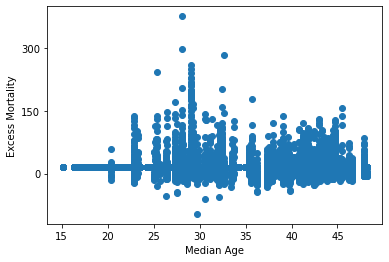

In [61]:
# scatter plot
plt.scatter(age_death_df1['median_age'], age_death_df1['excess_mortality'])
plt.yticks(np.arange(0, 450, 150))
plt.xlabel('Median Age')
plt.ylabel('Excess Mortality')
plt.show()


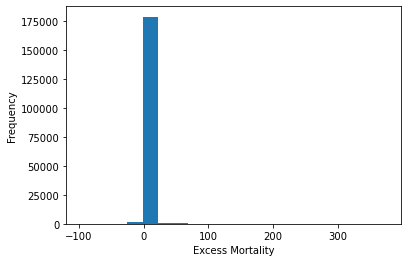

In [62]:
#create histogram

plt.hist(age_death_df1['excess_mortality'], bins=20)
plt.xlabel('Excess Mortality')
plt.ylabel('Frequency')
plt.show()


The r-value is: 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
181458   NaN
181459   NaN
181460   NaN
181461   NaN
181462   NaN
Name: median_age, Length: 181463, dtype: float64


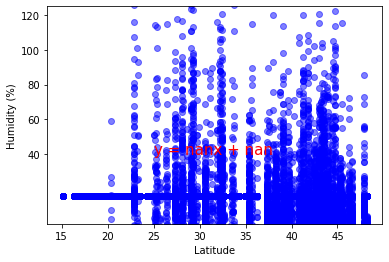

In [63]:
# linear regression
x = age_death_df1['median_age']
y= age_death_df1['excess_mortality']
slope, intercept, r_value, p_value, std_err = linregress(age_death_df1['median_age'], age_death_df1['excess_mortality'])
regress_value = x * slope + intercept
equation_of_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x,y, color = 'blue', marker='o',alpha=0.5)
plt.plot(x,regress_value, color = 'red')
plt.annotate(equation_of_line,xy=(25,40), fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
print(f"The r-value is: {regress_value}")
plt.ylim(0,125)
plt.yticks(np.arange(40,125,20))
plt.show()

In [64]:
# Alternate way to find the sorted top 50 countries
df = clean_covid_df.groupby('location',as_index=False).max()[['total_deaths','location']].sort_values(by='total_deaths', ascending=False)
df_topten = df.nlargest(50, 'total_deaths')
df_topten

,total_deaths,location
217,991254.0,United States
27,662891.0,Brazil
92,522223.0,India
168,367366.0,Russia
129,324129.0,Mexico
160,212742.0,Peru
216,173518.0,United Kingdom
99,162688.0,Italy
93,156100.0,Indonesia
70,145129.0,France


Progress of fully vaccinated people in the world by continent